In [1]:
!pip3 install -e .. -U

Obtaining file:///Users/adam/Desktop/Capfolio/tensortrade
  Found existing installation: TensorTrade 0.1.0rc1
    Uninstalling TensorTrade-0.1.0rc1:
      Successfully uninstalled TensorTrade-0.1.0rc1
  Running setup.py develop for tensortrade


In [2]:
%matplotlib inline

import pandas as pd

from stable_baselines.common.policies import MlpLnLstmPolicy
from stable_baselines import PPO2

from tensortrade.rewards import SimpleProfit
from tensortrade.actions import DiscreteActions
from tensortrade.features.stationarity import FractionalDifference
from tensortrade.features.scalers import MinMaxNormalizer
from tensortrade.features import FeaturePipeline

normalize = MinMaxNormalizer(inplace=True)
difference = FractionalDifference(difference_order=0.6,
                                  inplace=True)
feature_pipeline = FeaturePipeline(steps=[normalize, difference])

reward_scheme = SimpleProfit()
action_scheme = DiscreteActions(n_actions=20, instrument='ETH/BTC')

ohlcv_data = pd.read_csv('./data/Coinbase_BTCUSD_1h.csv', skiprows=1)
ohlcv_data = ohlcv_data[['open','high','low','close','volume']]

model = PPO2
policy = MlpLnLstmPolicy
params = { "learning_rate": 1e-5, 'nminibatches': 1 }

In [3]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import StableBaselinesTradingStrategy
from tensortrade.exchanges.simulated import FBMExchange

WINDOW_SIZE = 1

exchange = FBMExchange(base_instrument='BTC',
                       timeframe='1h',
                       window_size=WINDOW_SIZE,
                       pretransform=True)

environment = TradingEnvironment(exchange=exchange,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme,
                                 feature_pipeline=feature_pipeline)

strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

performance = strategy.run(steps=1665)

performance[-5:]

Finished running strategy.
Total episodes: 1 (1665 timesteps).
Average reward: -13.368379941791092.


,balance,net_worth
1138,269.780228,290867.562868
1139,70.855746,290193.312156
1140,1.194646,290917.330147
1141,0.901016,297387.757256
1142,216531.740382,290134.137294


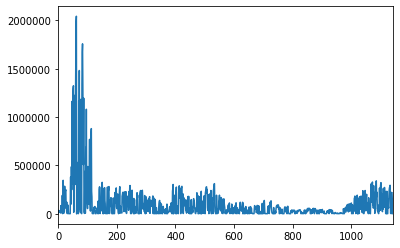

In [4]:
performance.balance.plot()

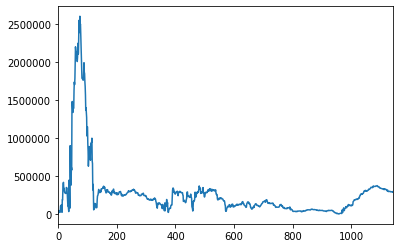

In [5]:
performance.net_worth.plot()

In [6]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import StableBaselinesTradingStrategy
from tensortrade.exchanges.simulated import SimulatedExchange

exchange = SimulatedExchange(base_instrument='USD',
                             data_frame=ohlcv_data,
                             price_column='close',
                             window_size=WINDOW_SIZE,
                             pretransform=True)

environment = TradingEnvironment(exchange=exchange,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme,
                                 feature_pipeline=feature_pipeline)

strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

performance = strategy.run(steps=1665)

performance[-5:]

Finished running strategy.
Total episodes: 0 (1665 timesteps).
Average reward: -1.6596402588157382.


,balance,net_worth
1189,3.764496,225.284677
1190,57.888346,224.182292
1191,139.278531,222.562795
1192,104.414734,222.176566
1193,220.343504,220.343504


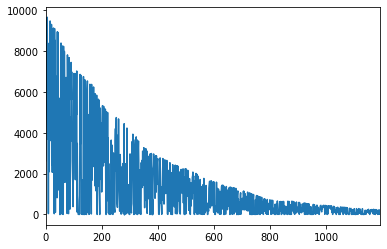

In [7]:
performance.balance.plot()

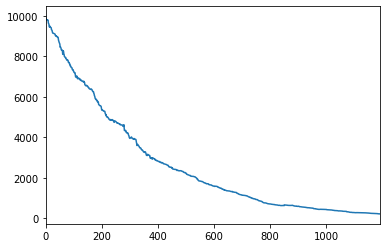

In [8]:
performance.net_worth.plot()

In [9]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import StableBaselinesTradingStrategy
from tensortrade.exchanges.simulated import FBMExchange

WINDOW_SIZE = 20

exchange = FBMExchange(base_instrument='BTC',
                       timeframe='1h',
                       window_size=WINDOW_SIZE,
                       pretransform=True)

environment = TradingEnvironment(exchange=exchange,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme,
                                 feature_pipeline=feature_pipeline)

strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

performance = strategy.run(steps=1665)

performance[-5:]

Finished running strategy.
Total episodes: 1 (1665 timesteps).
Average reward: -3.180195207328903.


,balance,net_worth
1211,212.610524,3513.720441
1212,2714.931713,3551.605106
1213,45.801975,3560.514688
1214,2496.697616,3322.646425
1215,14.582188,3295.646023


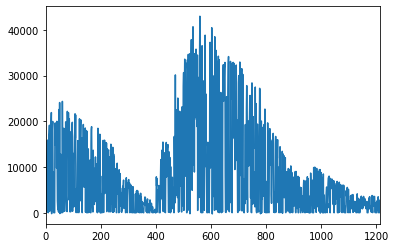

In [10]:
performance.balance.plot()

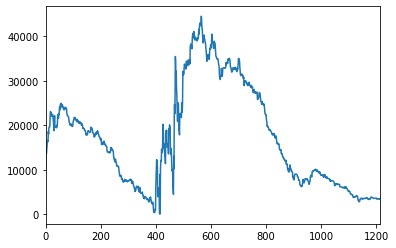

In [11]:
performance.net_worth.plot()

In [12]:
from tensortrade.environments import TradingEnvironment
from tensortrade.strategies import StableBaselinesTradingStrategy
from tensortrade.exchanges.simulated import SimulatedExchange

WINDOW_SIZE = 20

exchange = SimulatedExchange(base_instrument='USD',
                             data_frame=ohlcv_data,
                             price_column='close',
                             window_size=WINDOW_SIZE,
                             pretransform=True)

environment = TradingEnvironment(exchange=exchange,
                                 action_scheme=action_scheme,
                                 reward_scheme=reward_scheme,
                                 feature_pipeline=feature_pipeline)

strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

performance = strategy.run(steps=1665)

performance[-5:]

Finished running strategy.
Total episodes: 0 (1665 timesteps).
Average reward: -1.614955663352993.


,balance,net_worth
1185,247.830427,438.424608
1186,295.048739,438.230476
1187,77.493349,438.176970
1188,256.859009,436.764214
1189,301.033103,436.841314


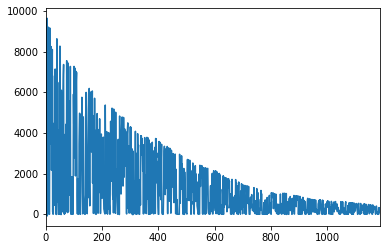

In [13]:
performance.balance.plot()

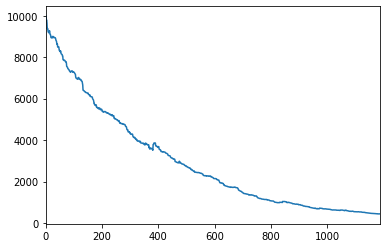

In [14]:
performance.net_worth.plot()

In [15]:
strategy.save_agent('agents/PPO_BTC_1h')